In [6]:
#importing necessary packages
import numpy as np
import pandas as pd
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

%matplotlib inline

from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols


Objectives

Advise customers to find a new home and help them to live with a good adequate quality.

Summary

We used the dataset County Health Data gathered by The Robert Wood Johnson Foundation and University of Wisconsin. link. We analysed the dataset to find out about significant contributers of quality of life. We assumed that " Good Mental Health" is a measurement of a good quality of life.

Methodology

We applied our knowledge of the CRISP-DM methodology to investigate the dataset.
We applied our previous knowledge of cleaning, EDA, dropping features based on correlations and p-values in order to prepare our dataset for modeling.
We tested the model with Interaction/Polynomial/Ridge and Lasso models using cross validation tecnique to find the best Regression Line.
This model could be used for those who wish to move into the US in the future and this model would help them to choose a good location to settle down.

In [18]:
#import data from csv file
df = pd.read_csv('analytic_data2019.csv')
pd.set_option('display.max_columns', None)

In [19]:
df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [20]:
df = df.drop(df.index[0])

In [21]:
#checking shape
df.shape

(3194, 534)

In [22]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [23]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [24]:
# df_columns
df_columns = df.columns
df_columns = list(df_columns)


In [25]:
df.describe()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [26]:
#filter out all the unnecessaty words and words which might cause an issue of racism.
filter_out = ['White','white','Black','black','Hispanic','hispanic','CI', 'numerator', 'denominator']
for f in filter_out:
        df = df.loc[:, ~df.columns.str.contains(f)]

In [27]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value']


In [28]:
df1=df[['State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]
df2 = df.iloc[:,7:].astype(float)
dfclean = df1.merge(df2, left_index=True,right_index=True)
dfclean.head()


,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
1,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,0.080893,NaN,0.285,7.7,0.222,0.838945,NaN,0.285715,497.3,24.710326,0.100089,0.000754,1325.716601,0.000684,1461.331847,0.002287,437.275036,NaN,NaN,NaN,0.846000,0.652256,0.043556,0.184,4.941486,0.332517,9.300353,386.464896,67.387264,NaN,NaN,0.183731,NaN,NaN,NaN,0.764422,0.352,79.063850

In [29]:
dfclean.dropna(axis=0, subset=['County_Ranked_(Yes=1/No=0)'], inplace=True)
dfclean = dfclean.drop(columns = ['County_Ranked_(Yes=1/No=0)'])

In [30]:
#checking the data types for each column
for col in dfclean.columns:
    print(dfclean[col].dtypes, col)

object State_Abbreviation
object Name
object Release_Year
float64 Premature_death_raw_value
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Uninsured_raw_value
float64 Primary_care_physicians_raw_value
float64 Ratio_of_population_to_primary_care_physicians.
float64 Dentists_raw_value
float64 Ratio_of_population_to_dentists.
float64 Mental_health_providers_raw_value
float64 Ratio_of_population_to_mental_health_providers.
float64 Preventable_hospital_stays_raw_value
float64 Mammography_screening_raw_value
float64 Flu_

In [31]:
# checking for missing values in each column
for cols in dfclean:
    print(dfclean[cols].name)
    print(dfclean[cols].isna().sum())

State_Abbreviation
0
Name
0
Release_Year
0
Premature_death_raw_value
61
Poor_or_fair_health_raw_value
0
Poor_physical_health_days_raw_value
0
Poor_mental_health_days_raw_value
0
Low_birthweight_raw_value
107
Adult_smoking_raw_value
0
Adult_obesity_raw_value
0
Food_environment_index_raw_value
19
Physical_inactivity_raw_value
0
Access_to_exercise_opportunities_raw_value
6
Excessive_drinking_raw_value
0
Alcohol-impaired_driving_deaths_raw_value
33
Sexually_transmitted_infections_raw_value
158
Teen_births_raw_value
144
Uninsured_raw_value
1
Primary_care_physicians_raw_value
135
Ratio_of_population_to_primary_care_physicians.
135
Dentists_raw_value
85
Ratio_of_population_to_dentists.
85
Mental_health_providers_raw_value
252
Ratio_of_population_to_mental_health_providers.
252
Preventable_hospital_stays_raw_value
38
Mammography_screening_raw_value
19
Flu_vaccinations_raw_value
16
High_school_graduation_raw_value
99
Some_college_raw_value
0
Unemployment_raw_value
1
Children_in_poverty_raw_valu

In [33]:
#dropping columns with more than 50 percent of missing values
for cols in dfclean:
    if (dfclean[cols].isna().sum()/len(dfclean))*100 > 50:
        dfclean.drop([cols], axis=1, inplace=True)

In [34]:
dfreg = dfclean
dfreg.iloc[:,1:] = dfreg.groupby("State_Abbreviation").transform(lambda x: x.fillna(x.median()))
dfreg = dfreg.drop(columns = ['Name', 'Release_Year'])
dfreg = dfreg.dropna(axis='columns')



In [38]:
# we can see that there is no missing data.
for col in dfreg.columns:
    print(dfreg[col].isna().sum(), col)

0 State_Abbreviation
0 Premature_death_raw_value
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hospital_stays_raw_value
0 Mammography_screening_raw_value
0 Flu_vaccinations_raw_value
0 High_school_graduation_raw_value
0 Some_college_raw_value
0 Unemployment_raw_value
0 Children_in_poverty_raw_value
0 Income_inequality_raw_value
0 Children_

# Initial Data Exploration

We are using visual aids to explore the data and check whether the dependent variable is a good choice.

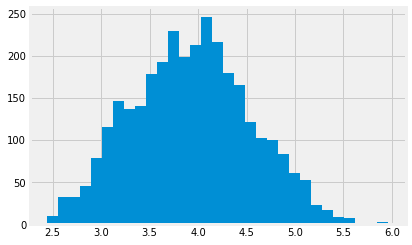

In [40]:
plt.hist(dfreg['Poor_mental_health_days_raw_value'], bins = 'auto')
plt.show()

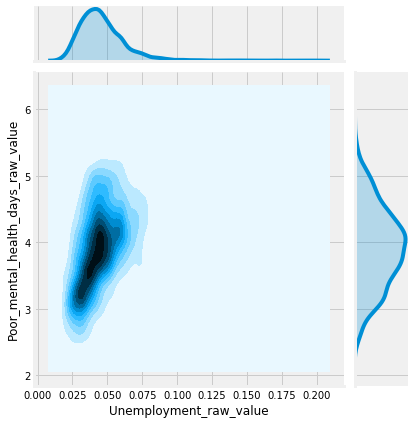

In [41]:
sns.jointplot("Unemployment_raw_value", "Poor_mental_health_days_raw_value", data=dfreg, kind='kde')
plt.show()

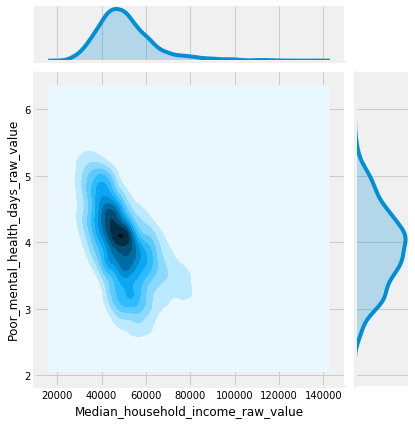

In [56]:
sns.jointplot("Median_household_income_raw_value", "Poor_mental_health_days_raw_value", data=dfreg1, kind='kde')
plt.show()

In [42]:
dfreg.describe()

,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Median_household_income_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,8462.386017,0.174833,3.922021,3.932145,0.080756,0.178726,0.320715,7.467696,0.257000,0.629375,0.174114,0.293115,379.214258,31.897495,0.111365,0.000543,2567.700085,0.000451,2824.265502,0.001441,1829.769703,4811.877626,0.399346,0.404095,0.882564,0.576105,0.046180,0.215475,4.515198,0.323924,13.783436,248.846771,85.000795,0.142363,0.114254,0.024131,0.012605,0.795246,0.309554,77.469110,406.036362,60.997345,0.119901,0.122096,0.116264,0.136975,0.086297,18.783843,18.913694,0.330426,0.132854,0.058620,0.000769,1848.552310,51098.339115,14.785582,0.713382,0.114958,1.036662e+05,0.222349,0.188134,0.023302,0.015272,0.001369,0.017312,0.498935,0.586348
std,2713.205981,0.046994,0.714456,0.613682,0.020314,0.036601,0.045890,1.163198,0.051734,0.230832,0.032429,0.151693,251.207171,14.879810,0.049407,0.000346,2423.334911,0.000310,2580.291853,0.001562,2444.971239,1864.904757,0.075466,0.097859,0.073808,0.117017,0.016762,0.091222,0.745076,0.105321,7.058535,187.893363,25.39

In this section, we did a preliminary check on the dependent variable which is poor mental health for linear regression analysis.

# Check Correlation

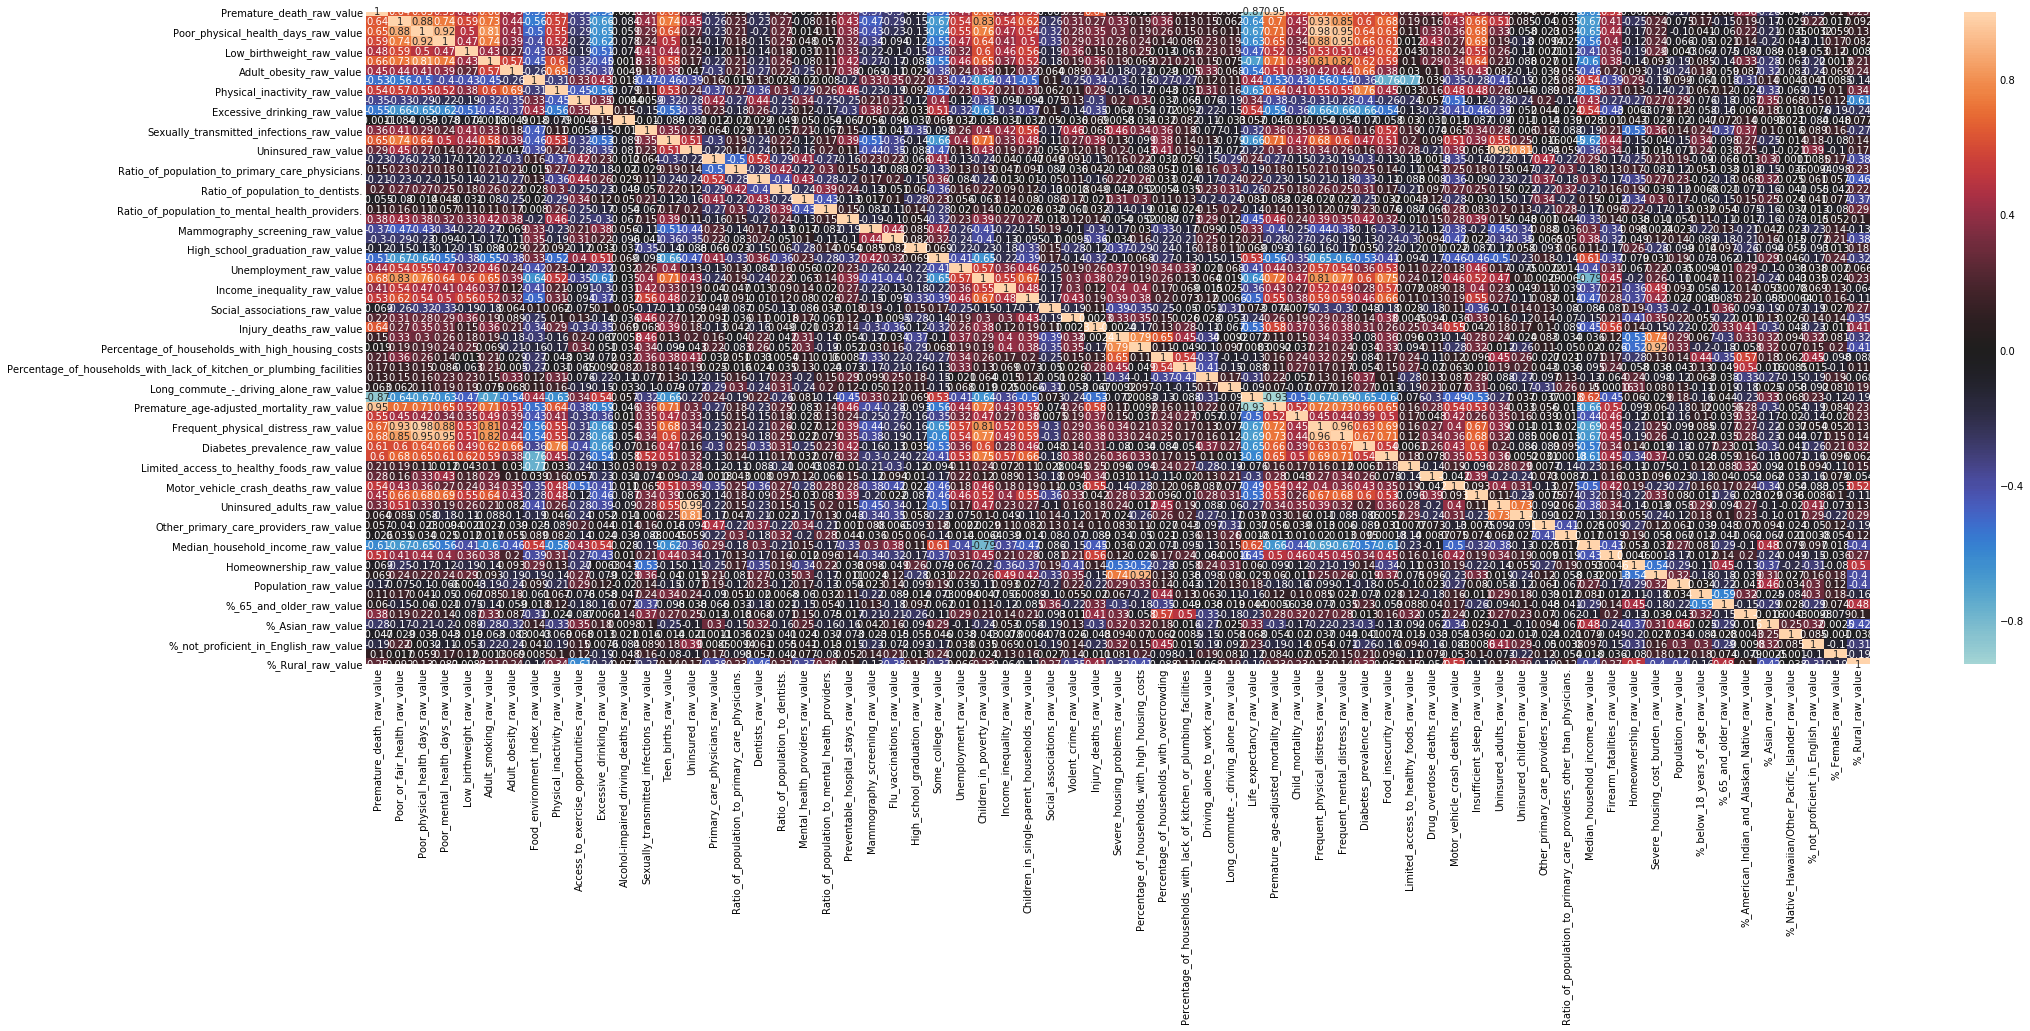

In [52]:
# creating a heatmap to see correlation between variables
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(30,12))
sns.heatmap(dfreg.corr(), center=0, annot=True)

It is not easy to see the correlation since we have too many variables. Thus, i will get rid of variables with a reason soon.

In [53]:
corr_matrix = dfreg.corr()

In [54]:
# to check the correlation with Poor mental health days.
corr_matrix["Poor_mental_health_days_raw_value"].abs().sort_values(ascending=False)[:60]

Poor_mental_health_days_raw_value                                       1.000000
Frequent_mental_distress_raw_value                                      0.953254
Poor_physical_health_days_raw_value                                     0.919823
Frequent_physical_distress_raw_value                                    0.878407
Poor_or_fair_health_raw_value                                           0.743129
Adult_smoking_raw_value                                                 0.739957
Insufficient_sleep_raw_value                                            0.691513
Diabetes_prevalence_raw_value                                           0.655154
Premature_age-adjusted_mortality_raw_value                              0.647103
Children_in_poverty_raw_value                                           0.638065
Life_expectancy_raw_value                                               0.633379
Excessive_drinking_raw_value                                            0.620358
Food_insecurity_raw_value   

In [73]:
# we deleted 'frequent_mental_distress' since its very much similar to poor mental health days.
# we also dropped 'frequent_physical_distress' becauseit will be similar to poor physical health days.
cols_to_exc = []
cols_to_exc.extend(
    ['Frequent_mental_distress_raw_value', 'Frequent_physical_distress_raw_value'] 
)

In [74]:
dfreg.drop(labels = cols_to_exc, axis = 1, inplace = True)
dfreg.shape

(3142, 66)

and then we delete any correlation under 0.46 to reduce the number of insignificant variables.

# Modeling

# baseline model

In this section, we are creating a baseline model, using selected variables.

In [80]:
y = dfreg[['Poor_mental_health_days_raw_value']]
X = dfreg[['Poor_physical_health_days_raw_value'                                  
,'Poor_or_fair_health_raw_value'                                          
,'Adult_smoking_raw_value'                                                
,'Insufficient_sleep_raw_value'                                           
,'Diabetes_prevalence_raw_value'                                          
,'Premature_age-adjusted_mortality_raw_value'                             
,'Children_in_poverty_raw_value'                                           
,'Life_expectancy_raw_value'                                              
,'Excessive_drinking_raw_value'                                            
,'Food_insecurity_raw_value'                                               
,'Premature_death_raw_value'                                               
,'Median_household_income_raw_value'                                       
,'Some_college_raw_value'                                                  
,'Physical_inactivity_raw_value'                                           
,'Children_in_single-parent_households_raw_value'                          
,'Teen_births_raw_value'                                                   
,'Low_birthweight_raw_value'                                               
,'Unemployment_raw_value']]


In [81]:
# these are variables we will use for the rest of the project
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state= 42)

In [82]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=10)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
baseline_model_results = cross_validate(
    regression, X_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
baseline_model_results

{'fit_time': array([0.04297376, 0.00499678, 0.00499964, 0.00699639, 0.00599599]),
 'score_time': array([0.00299978, 0.00299835, 0.00199962, 0.00199795, 0.00199342]),
 'test_score': array([0.8987409 , 0.89694337, 0.87781011, 0.89042687, 0.89068021]),
 'train_score': array([0.89249003, 0.89271016, 0.8970944 , 0.89433474, 0.89401852])}

In [89]:
baseline_validation_score = np.mean(baseline_model_results['test_score'])
baseline_train_score = np.mean(baseline_model_results['train_score'])

In [90]:
baseline_validation_score

0.8909202898970754

Using the K-Fold method, we check the model's performance on the different validation sets. The result seems to oscillate near 0.9.

In [91]:
sc = StandardScaler()

In [92]:
X_train_scaled = sc.fit_transform(X_train)

In [94]:
baseline_scaled_score = np.mean(cross_val_score(regression, X_train_scaled, y_train, scoring='r2', cv=crossvalidation))
baseline_scaled_score

0.8909202898974389

scaled variables give 0.890920 and unscaled 0.890920. those data are nearly the same!

# Interactions

In [96]:
combs = list(combinations(X_train.columns, 2))

In [97]:
# the cell runs for a while
interactions = []

for comb in combs:
    
    data = X_train.copy()
    
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
    if score > baseline_validation_score: interactions.append((comb[0], comb[1], round(score, 3)))

We decided to add the top 7 interaction pairs and see how they improve the model.

In [99]:
interactions = sorted(interactions, key = lambda x: x[2], reverse = True)
interactions_to_add = [interaction for interaction in interactions[:7]]
interactions_to_add

[('Insufficient_sleep_raw_value', 'Food_insecurity_raw_value', 0.896),
 ('Insufficient_sleep_raw_value', 'Low_birthweight_raw_value', 0.895),
 ('Poor_physical_health_days_raw_value',
  'Insufficient_sleep_raw_value',
  0.894),
 ('Poor_or_fair_health_raw_value', 'Insufficient_sleep_raw_value', 0.894),
 ('Insufficient_sleep_raw_value', 'Excessive_drinking_raw_value', 0.894),
 ('Excessive_drinking_raw_value', 'Low_birthweight_raw_value', 0.894),
 ('Poor_physical_health_days_raw_value', 'Food_insecurity_raw_value', 0.893)]

Insufficient sleep appears in many combinations, so we are doing further analysis via visualisation. We are going to create a category variable that is determined based on the 33rd and 67th percentile, and then plot linear regressions for the three separate groups.

In [100]:
insufficient_sleep = np.asarray(X_train[['Insufficient_sleep_raw_value']]).reshape(len(X_train[['Insufficient_sleep_raw_value']]))

In [112]:
insufficient_sleep_category = []
for insuff_sleep in X_train.Insufficient_sleep_raw_value:
    if insuff_sleep > np.percentile(insufficient_sleep, 67):
        insufficient_sleep_category.append('high_insuff_sleep')
    elif insuff_sleep > np.percentile(insufficient_sleep, 33) and insuff_sleep <= np.percentile(insufficient_sleep, 67):
        insufficient_sleep_category.append('med_insuff_sleep')
    elif insuff_sleep <= np.percentile(insufficient_sleep, 67):
        insufficient_sleep_category.append('low_insuff_sleep')                                
        
X_train['insufficient_sleep_category'] = insufficient_sleep_category

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [113]:
data = pd.concat([X_train, y_train], axis =1)
X_train_high_is = data[data['insufficient_sleep_category'] == 'high_insuff_sleep']
X_train_medium_is = data[data['insufficient_sleep_category'] == 'med_insuff_sleep']
X_train_low_is = data[data['insufficient_sleep_category'] == 'low_insuff_sleep']

In [114]:
def plot_with_insuff_sleep(column_name):
    plt.figure(figsize = (10,10))
    sns.regplot(x = X_train_high_is[column_name], y = X_train_high_is['Poor_mental_health_days_raw_value'], label='high insufficient sleep')
    sns.regplot(x = X_train_medium_is[column_name], y = X_train_medium_is['Poor_mental_health_days_raw_value'], label='medium insufficient sleep')
    sns.regplot(x = X_train_low_is[column_name], y = X_train_low_is['Poor_mental_health_days_raw_value'], label='low insufficient sleep')
    plt.legend()
    plt.show()

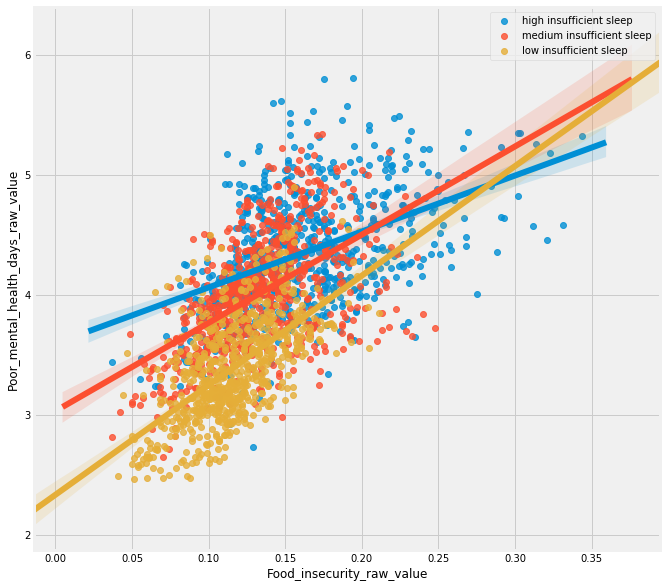

In [115]:
plot_with_insuff_sleep('Food_insecurity_raw_value')

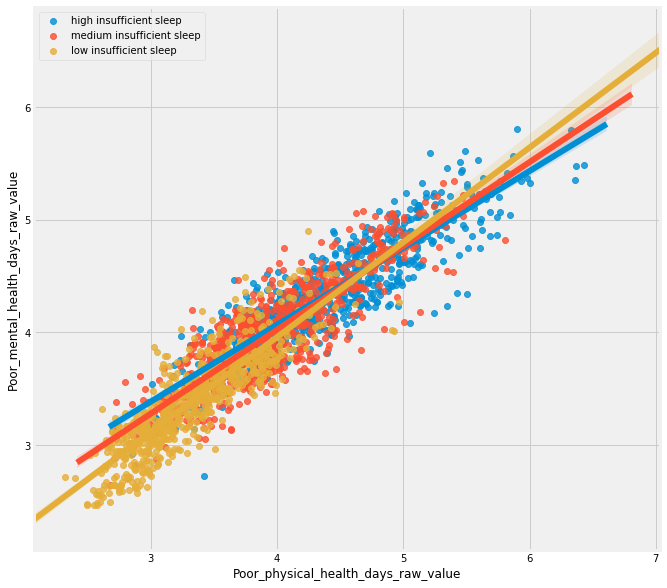

In [116]:
plot_with_insuff_sleep('Poor_physical_health_days_raw_value')

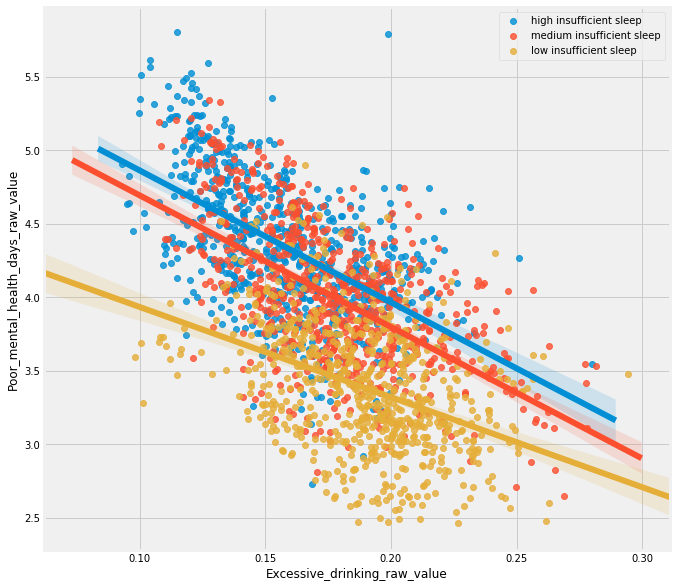

In [117]:
plot_with_insuff_sleep('Excessive_drinking_raw_value')

In [118]:
# dropping the categorical variables after the analysis is done
X_train.drop('insufficient_sleep_category', axis = 1, inplace = True)

In [119]:
X_train_inter = X_train.copy()
for interaction in interactions_to_add:
    X_train_inter[interaction[0] + '_' + interaction[1]] = \
    X_train_inter[interaction[0]] * X_train_inter[interaction[1]]

In [120]:
interaction_model_results = cross_validate(
    regression, X_train_inter, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
)
interaction_model_results

{'fit_time': array([0.00999451, 0.0059967 , 0.00999498, 0.00599623, 0.00500011]),
 'score_time': array([0.00299883, 0.0029974 , 0.00299788, 0.00299835, 0.00299597]),
 'test_score': array([0.906502  , 0.89764254, 0.88734211, 0.89341029, 0.89486707]),
 'train_score': array([0.89762614, 0.89968158, 0.90184117, 0.90044088, 0.90011115])}

In [121]:
interaction_validation_score = np.mean(interaction_model_results['test_score'])
interaction_train_score = np.mean(interaction_model_results['train_score'])

In [122]:
interaction_validation_score

0.8959528024441351

After that, we added the top 7 interactions, our model increased by 0.005 from its base model (0.890920).

# Polynomials

we are adding the polynomials of the variables to find the mproved model.

In [123]:
# similar to interaction process, looping through columns, add polynomials to X_train individually, 
# check if score improves baseline
polynomials = []

for column in X_train.columns:
    
    for degree in [2, 3, 4]:

        data = X_train.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X_train[[column]])
        
        data.reset_index(drop=True, inplace=True)
        X_transformed = pd.DataFrame(X_transformed)
        X_transformed.reset_index(drop=True, inplace=True)
        
        data = pd.concat([data.drop(column, axis=1),X_transformed], axis=1)
        
        score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
        if score > baseline_validation_score: polynomials.append((column, degree, round(score, 3)))

In [124]:
polynomials = sorted(polynomials, key = lambda x: x[2],reverse = True)

In [133]:
polynomials[:7]

[('Insufficient_sleep_raw_value', 2, 0.897),
 ('Insufficient_sleep_raw_value', 3, 0.897),
 ('Insufficient_sleep_raw_value', 4, 0.897),
 ('Food_insecurity_raw_value', 3, 0.894),
 ('Food_insecurity_raw_value', 4, 0.894),
 ('Physical_inactivity_raw_value', 2, 0.894),
 ('Physical_inactivity_raw_value', 3, 0.894)]

In [134]:
def chart_polynomials(column_name):
    
    
#   colors = ['g', 'y', 'r','g']
    plt.figure(figsize = (10,10))
    sns.scatterplot(X_train[column_name], y_train)

    for index, degree in enumerate([1,2,3,4]):

        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(X_train[[column_name]])
        reg_poly = LinearRegression().fit(X_poly_train, y_train)

        y_pred = reg_poly.predict(X_poly_train)

        print('R_squared = ' + str(degree) + " : " + str(r2_score(y_train, y_pred)))

#         sns.lineplot(X_train['insufficient_sleep'], y_pred, color = colors[index], label = 'degree: ' + str(degree))
        
        sns.lineplot(X_train[column_name], y_pred, label = 'degree: ' + str(degree))

    plt.show()

In [135]:
chart_polynomials('Insufficient_sleep_raw_value')

ValueError: could not broadcast input array from shape (2142) into shape (1)

<Figure size 720x720 with 0 Axes>

In [136]:
polynomials_to_add = []
for variable in polynomials:
    if len(polynomials_to_add) == 10:
        break
    elif variable[0] not in polynomials_to_add:
        polynomials_to_add.append(variable[0])

In [137]:
X_train_poly = X_train.copy()
for column in polynomials_to_add:
    for degree in [2,3,4]:
        X_train_poly[column + "_degree" + str(degree)] = X_train_poly[column] ** degree

In [138]:
polynomial_model_results =  cross_validate(
    regression, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
)
polynomial_model_results

{'fit_time': array([0.01698995, 0.02098823, 0.00699663, 0.00799489, 0.00799632]),
 'score_time': array([0.00200319, 0.00299788, 0.00299668, 0.00399756, 0.00299907]),
 'test_score': array([0.91209793, 0.90018687, 0.89957328, 0.90414382, 0.90501268]),
 'train_score': array([0.90860584, 0.91131824, 0.91167317, 0.91061756, 0.91048784])}

In [139]:
polynomial_validation_score = np.mean(polynomial_model_results['test_score'])
polynomial_train_score = np.mean(polynomial_model_results['train_score'])

In [140]:
polynomial_validation_score

0.9042029192687953

Again we increased the value of 0.01 by using polynomial.(from its base model (0.890920)) 

# Linear Regression - With Overfitting Issues)¶

we are adding all the possible polynomial combinations to a second degree. We are purposefully overfitting the model in this section. We are using the PolynomialFeatures to create all the possible polynomial combinations of our variables.

In [146]:
X_train_everything = X_train.copy()

In [147]:
poly = PolynomialFeatures(2, include_bias = False, interaction_only = False)
X_train_everything = poly.fit_transform(X_train_everything)

polynomial_column_names = poly.get_feature_names(input_features = X_train.columns)

X_train_everything = pd.DataFrame(data =X_train_everything, columns = polynomial_column_names )

X_train_everything.columns = X_train_everything.columns.str.replace(' ', '_')
X_train_everything.columns = X_train_everything.columns.str.replace('^', '_')

In [148]:
regression = LinearRegression()
everything_modelresults =  cross_validate(
    regression, X_train_everything, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
)
everything_modelresults

{'fit_time': array([0.03697801, 0.03697848, 0.02898288, 0.0289855 , 0.03098416]),
 'score_time': array([0.00099993, 0.00200152, 0.00299907, 0.00299811, 0.00299644]),
 'test_score': array([0.91316069, 0.89845337, 0.89677011, 0.89139695, 0.73956456]),
 'train_score': array([0.92711367, 0.92830994, 0.93026528, 0.92941354, 0.92870055])}

In [149]:
regression = LinearRegression(normalize = True)
everything_modelresults =  cross_validate(
    regression, X_train_everything, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
)
everything_modelresults

{'fit_time': array([0.04197311, 0.03298092, 0.02998257, 0.02898288, 0.02998281]),
 'score_time': array([0.00300002, 0.00299764, 0.00399685, 0.0029974 , 0.00399804]),
 'test_score': array([0.91327858, 0.89870763, 0.89657054, 0.89259638, 0.74308174]),
 'train_score': array([0.92712041, 0.92831767, 0.93027086, 0.92942031, 0.92870398])}

We are also creating a scaled version of the X that includes everything.

In [150]:
sc = StandardScaler()
X_train_everything_scaled = sc.fit_transform(X_train_everything)
X_train_everything_scaled = pd.DataFrame(data = X_train_everything_scaled, columns = X_train_everything.columns)

In [151]:
regression = LinearRegression()
everything_scaled_modelresults =  cross_validate(
    regression, X_train_everything_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
)
everything_scaled_modelresults


{'fit_time': array([0.03198051, 0.02898192, 0.0329814 , 0.03498101, 0.03497958]),
 'score_time': array([0.00199962, 0.00299931, 0.0030005 , 0.00299859, 0.00299788]),
 'test_score': array([0.91327858, 0.89870763, 0.89657054, 0.89259638, 0.74308174]),
 'train_score': array([0.92712041, 0.92831767, 0.93027086, 0.92942031, 0.92870398])}

In [152]:
everything_validation_score = np.mean(everything_scaled_modelresults['test_score'])
everything_train_score = np.mean(everything_scaled_modelresults['train_score'])

In [153]:
everything_validation_score

0.8688469742564324

the figure is lower than our benchmark models. i assume that there is a overfitting issue within variables. 

# Linear Regression - Regularisation
We are applying regularisation methods (LASSO method (L1),
Ridge method (L2)) to avoid overfitting the model. 

In [154]:
lasso_alphas = np.linspace(0, 0.002, 10)

In [155]:
lasso_test_r2 = []
lasso_train_r2 = []
results_list = []

for curr_alpha in lasso_alphas:
    
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train_everything_scaled, y_train)
    
    results = cross_validate(
    lasso, X_train_everything_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
    )
    
    lasso_test_r2.append(np.mean(results['test_score']))
    lasso_train_r2.append(np.mean(results['train_score']))
    results_list.append(results)

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.87137281224264, tolerance: 0.07992469362216453
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_des

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29596769485495145, tolerance: 0.06484821447951646
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17755959058186477, tolerance: 0.064900623519756
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5799009912277242, tolerance: 0.06310615421426781
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

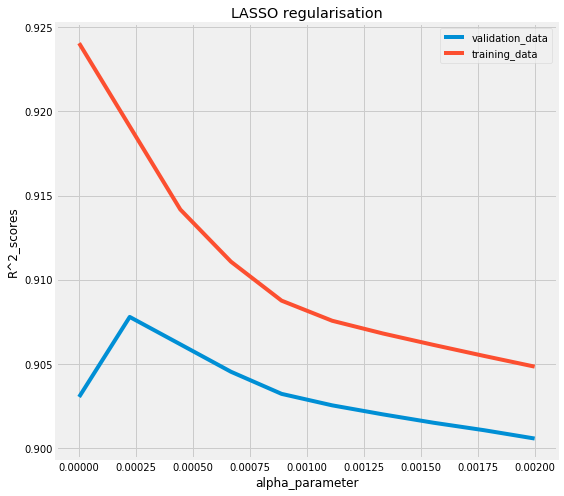

In [156]:
plt.figure(figsize = (8,8))
sns.lineplot(y = lasso_test_r2, x = lasso_alphas, label = 'validation_data')
sns.lineplot(y = lasso_train_r2, x = lasso_alphas, label = 'training_data')
plt.xlabel('alpha_parameter')
plt.ylabel('R^2_scores')
plt.title('LASSO regularisation')
plt.legend()
plt.show()

In [157]:
chosen_alpha = lasso_alphas[np.argmax(lasso_test_r2)]
chosen_alpha

0.00022222222222222223

In [158]:
lasso = Lasso(alpha = chosen_alpha)
lasso_model_results = cross_validate(
    lasso, X_train_everything_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
    )
lasso_model_results

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.087023423416973, tolerance: 0.06393635732120284
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2910506612587405, tolerance: 0.06289059831850075
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.307304907464626, tolerance: 0.06484821447951646
  positive)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

{'fit_time': array([0.43175387, 0.49871731, 0.48672104, 0.56067872, 0.44374537]),
 'score_time': array([0.00399709, 0.00299621, 0.00700331, 0.00299883, 0.00199866]),
 'test_score': array([0.91974581, 0.90956273, 0.90056586, 0.90713976, 0.90192343]),
 'train_score': array([0.9169708 , 0.91938003, 0.92054012, 0.91938981, 0.91925677])}

In [159]:
lasso_validation_score = np.mean(lasso_model_results['test_score'])
lasso_train_score = np.mean(lasso_model_results['train_score'])

In [160]:
lasso_validation_score

0.9077875173716601

Using a LASSO method with an alpha of 0.00022 significantly increased the test score of the model.

Ridge Method
we are investigating a range of alphas, and will run a model on the one we found the best based on the K-Fold validation test score.

In [161]:
ridge_alphas = np.linspace(0,200,20)

ridge_test_r2 = []
ridge_train_r2 = []
ridge_results_list = []

for curr_alpha in ridge_alphas:
    
    ridge = Ridge(alpha = curr_alpha)
    ridge.fit(X_train_everything_scaled, y_train)
    
    results = cross_validate(
    ridge, X_train_everything_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
    )
    
    ridge_test_r2.append(np.mean(results['test_score']))
    ridge_train_r2.append(np.mean(results['train_score']))
    ridge_results_list.append(results)

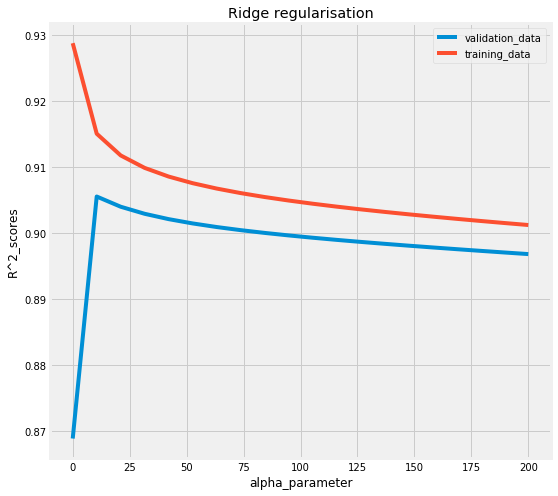

In [162]:

plt.figure(figsize = (8,8))
sns.lineplot(y = ridge_test_r2, x = ridge_alphas, label = 'validation_data')
sns.lineplot(y = ridge_train_r2, x = ridge_alphas, label = 'training_data')
plt.xlabel('alpha_parameter')
plt.ylabel('R^2_scores')
plt.title('Ridge regularisation')
plt.legend()
plt.show()

In [164]:
chosen_alpha_ridge = ridge_alphas[np.argmax(ridge_test_r2)]
chosen_alpha_ridge

10.526315789473685

In [165]:
ridge = Ridge(alpha = chosen_alpha_ridge)

ridge_model_results = cross_validate(
    ridge, X_train_everything_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True
    )

ridge_model_results

{'fit_time': array([0.01399755, 0.01199436, 0.01199675, 0.01199174, 0.01499605]),
 'score_time': array([0.0019927 , 0.00199795, 0.00299907, 0.00199819, 0.00299644]),
 'test_score': array([0.91703076, 0.90927057, 0.89682974, 0.9027357 , 0.90176547]),
 'train_score': array([0.91284674, 0.91449172, 0.91691009, 0.91569303, 0.91529938])}

In [166]:
ridge_validation_score = np.mean(ridge_model_results['test_score'])
ridge_train_score = np.mean(ridge_model_results['train_score'])

In [167]:
ridge_validation_score

0.9055264464377426

Alpha 10.526315789473685
Obviously, Ridge method also increased the test score of the modeal.
